In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from Utility import check_missing_value
from scipy.stats import skew
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# paramateric vs non paramateric algo.
# assumption of linear regression
# what is outlier
# how do we treat outlier
# 

In [3]:
pwd

'C:\\Users\\Pratik Vichare\\Python learning'

In [4]:
# read data into DataFrame
data = pd.read_csv(r'C:\Users\Pratik Vichare\Downloads\Advertising.csv',index_col=0)
data.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [5]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


## Assumption 1 There should be no outliers in the Data

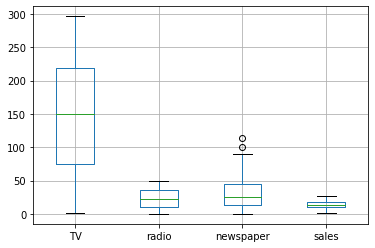

In [6]:
data.boxplot()

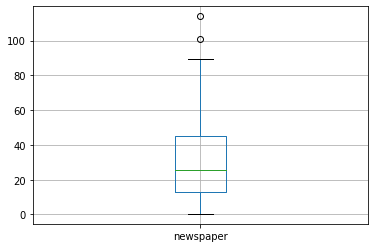

In [7]:
data.boxplot(column='newspaper')

# Note: if outlier present then we can treat using below approch
1. Elimination
    A. Directly drop the variable
2. Treat the outlier
    - Using Capping and Floaring approch
    - replace using measure of central tendency
3. If cluster is present then leave them as it is
4. check with the client if this is acceptable range or not

# Check Missing Value

In [8]:
def check_missing_value(data):
    """
    Objective: check missing value count and percentage in all columns
    
    data: input data frame
    return: Missing value data frame
    
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [9]:
miss = check_missing_value(data)
miss

,Total,Percent
sales,0,0.0
newspaper,0,0.0
radio,0,0.0
TV,0,0.0


# Note: 
    1. if missing value contains more than 50% of the data then you can drop the entire column
    2. if less than 50% than we can treat those missing values by using measure of central tendencies
    3. if column is categorial then you can use median to replace missing values
    4. if column is continuous numerical variable then you can use mean if that variable is not skewed
    5. You can predict the missing value by using other features (not recommended)
    6. you can directly ask to client
    7. common sence

## Assumption 2. Assumption of linearty : Every independent variable should have a Linear Relationship with the Dependent Variable

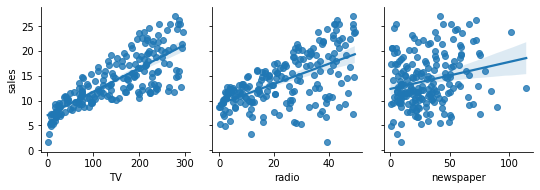

In [10]:
sns.pairplot(data,x_vars=["TV","radio","newspaper"],
            y_vars="sales",
            kind="reg")
plt.show()

# Note : If the assumption of Linearity is not met then we can drop the variable
- strong positive linear relationship in tv and sales
- moderately strong positive linear relaetionship in radio and sales
- no relation in newspaper sales also the C.I.(confidance interval) is high

In [11]:
# Print all columns name
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [12]:
# Create x and y
feature_cols = ["TV","radio","newspaper"]
X = data[["TV","radio","newspaper"]]
Y = data.sales

## Assumption 3: Assumption of Normality: The dependent variable should follow an approximate normal distribution

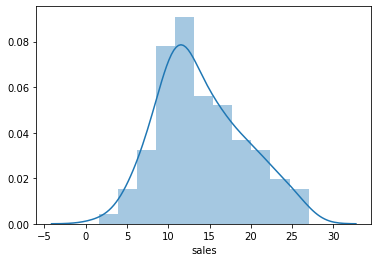

In [13]:
sns.distplot(Y,hist=True)
plt.show()

SALE variable is meeting the assumption and we can see the approximate normal distribution

# Note: If its not normal or if its skewed plot then we can transform the column in different transformation
1. Log Transform
    - most of the time we prefer log transform, because it will help you to smoothing the curve
2. SQRT Transform
    - IN sqrt transform we can see the peeks and sometime it will not help you to smoothing the curve

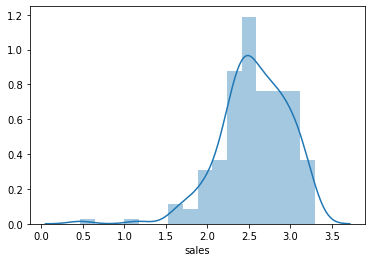

In [14]:
## you can use this code to convert into log transformation
Y_log = np.log(Y)
sns.distplot(Y_log,hist=True)
plt.show()
## Note: if your data is approximate normal then dont transform coz you will get skewed data

# Note : for good practice make sure that your X variable does not contain high skewness and if its approximately normal then it is good

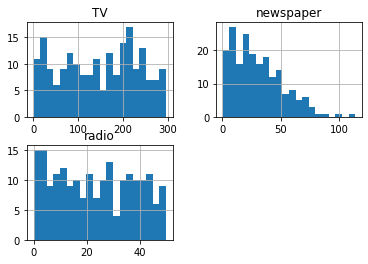

In [15]:
# check hist for all variables
X.hist(bins=20)
plt.show()

In [16]:
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

print(data_num_skew)
print(data_num_skewed)

# apply log + 1 transformation for all numeric features with skewness over 0.75
X[data_num_skewed.index]=np.log1p(X[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


## Assumption4: there should be no multicolinearity in the data
- Multicolinearity is problem where one variable is dependent on other, we want dependency between x and y variable but not in the X variables, so if X variables are depend on each other than the model will not be good.
- To check the multicolinearity we can use the pearson correlation or VIF value

# Pearson Correlation

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


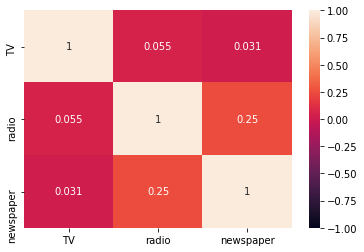

In [17]:
corr_data= X.corr(method="pearson")
print(corr_data)

sns.heatmap(corr_data,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

- we want value close to 0 means that is not correlated with each other

Note: if the correlation is high between two variables then drop one because both variable carrying the similar information so eliminate but think logically

# Check VIF(Various Inflation Factor)
- sometimes the correlation matrix alone will not help you to check the multicolinearity so you can use VIF

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data = pd.DataFrame()
vif_data["features"]= X.columns
vif_data["VIF Factor"]=[vif(X.values,i)for i in range(X.shape[1])]
vif_data.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


- less than 5 value is good in VIF which represents no multicolinearity

In [19]:
from sklearn.model_selection import train_test_split
# > 1000 --> TEST SIZE = 0.3
# < 1000 --> TEST SIZE = 0.3

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size=0.2,
                                                   random_state=10)

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [21]:
X_train

,TV,radio,newspaper
191,39.5,41.1,1.916923
8,120.2,19.6,2.533697
27,142.9,29.3,2.610070
139,43.0,25.9,3.068053
59,210.8,49.6,3.655840
...,...,...,...
114,209.6,20.6,2.459589
65,131.1,42.8,3.397858
16,195.4,47.7,3.987130
126,87.2,11.8,3.292126


In [22]:
Y_train

191    10.8
8      13.2
27     15.0
139     9.6
59     23.8
       ... 
114    15.9
65     18.0
16     22.4
126    10.6
10     10.6
Name: sales, Length: 160, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression
# create a model object
lm = LinearRegression()

# train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.3532913858151474
[ 0.0437425   0.19303708 -0.04895137]


In [24]:
# pair the feature names with the coefficients
print(list(zip(feature_cols,lm.coef_)))

[('TV', 0.04374250157742166), ('radio', 0.1930370789734531), ('newspaper', -0.048951368222487836)]


In [25]:
# try changing the value of X
X1=210.7 # TV
X2=29.5 # radio
X3=2.33214 # newspaper
y_pred=2.538407823884855+(0.046963380285860876*X1)+(0.046963380285860876*X2)+(0.08810284867942521*X3)
print(y_pred)

14.02447994606787


In [26]:
X_test.iloc[0]

TV           210.700000
radio         29.500000
newspaper      2.332144
Name: 60, dtype: float64

In [27]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [28]:
new_df = pd.DataFrame()
new_df = X_test

new_df['Actual Sales'] = Y_test
new_df['Predicted Sales'] = Y_pred
new_df

,TV,radio,newspaper,Actual Sales,Predicted Sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [29]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(Y_test,Y_pred)
print(r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.834801071903532
2.59297691109306
0.8322725168816474


In [30]:
print(min(Y))
print(max(Y))

1.6
27.0


In [31]:
new_df['Deviation']= new_df['Actual Sales'] - new_df['Predicted Sales']
new_df.to_excel('Advertising_pred.xlsx',header = True, index=False)
new_df.head()

,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


## Ridge Regression

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size=0.2,
                                                   random_state=10)

In [33]:
from sklearn.linear_model import Ridge
# create a model object
lm_ridge = Ridge()

# train the model object
lm_ridge.fit(X_train,Y_train)

# print intercept and coefficients
print(lm_ridge.intercept_)
print(lm_ridge.coef_)

# previous value using Regression
# 3.3532913858151474
# [ 0.0437425   0.19303708 -0.04895137]

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [34]:
# Prediction using Ridge Regression
Y_pred_ridge = lm_ridge.predict(X_test)

r2_ridge = r2_score(Y_test,Y_pred_ridge)
print(r2_ridge)

rmse_ridge = np.sqrt(mean_squared_error(Y_test,Y_pred_ridge))
print(rmse_ridge)

adjusted_r_squared_ridge = 1 - (1-r2_ridge)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared_ridge)

0.8348082644975934
2.592920462683998
0.832279819566434


## Lasso Regression

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size=0.2,
                                                   random_state=10)

In [36]:
from sklearn.linear_model import Lasso
# create a model object
lm_lasso = Lasso()

# train the model object
lm_lasso.fit(X_train,Y_train)

# print intercept and coefficients
print(lm_lasso.intercept_)
print(lm_lasso.coef_)

# previous value using Regression
# 3.3532913858151474
# [ 0.0437425   0.19303708 -0.04895137]

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [37]:
# Prediction using Lasso Regression
Y_pred_lasso = lm_lasso.predict(X_test)

r2_lasso = r2_score(Y_test,Y_pred_ridge)
print(r2_ridge)

rmse_lasso = np.sqrt(mean_squared_error(Y_test,Y_pred_lasso))
print(rmse_lasso)

adjusted_r_squared_lasso = 1 - (1-r2_lasso)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared_lasso)

0.8348082644975934
2.5831514271094234
0.832279819566434


## OLS Regression 

In [38]:
new_df = pd.DataFrame()
new_df = X_train
new_df['sales']=Y_train
new_df.shape

(160, 4)

In [39]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula= 'sales ~ TV + radio + newspaper',data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           1.10e-85
Time:                        08:36:52   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

## Assumption 5 : There should be no autocorelation in the data (check using Durbin Watson)
corelation is the relation between the variables & autocorrrelation is the relation between the observation, so whenever you have such kind of data where your observations are indipendent on each other, then linear regression algorithm is not suitable for e.g Time series data like stock prediction

- output range -> 0 to 4
- close to 2, no autocorelation
- close to 4, negative autocorelation
- close to 0, positive autocorelation

# Note: If autocorelation is present then perform Time Series or Other Algorithms